In [2]:
# Import the necessary libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the breast cancer dataset from sklearn datasets
# Split the features as x and target as y
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()

x=dataset.data
y=dataset.target

In [5]:
# Train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4)

In [6]:
# Check knn score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8951048951048951

### Using Bagging classifier over KNN for checking the model improvement.

In [7]:
bag_knn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=0.7,bootstrap=True,oob_score=True)

In [9]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.9020979020979021

-  Our Score has improved.
* Lets observe when bootstrap is false

In [10]:
pasting_knn= BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=0.7,bootstrap=False,random_state=3)

In [11]:
pasting_knn.fit(x_train,y_train)
pasting_knn.score(x_test,y_test)

0.8881118881118881

Slight variance with the knn score and when boot strap is false, apart from that bagging classifier performs better.

# Random Forest

# Problem Statement


- To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes .

In [12]:
#Important necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Preprocessing , Normalizing
from sklearn.preprocessing import StandardScaler

#Models

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.ensemble import RandomForestClassifier

#Metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report



import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [15]:
print(df.shape)

(69301, 13)


In [16]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000



-  There is No Missing Values

- Assuming Age is in Number of Days


- Outliers in Height


- Outliers in systolic Blood Pressure ap_hi



- Outliers in ap_lo


- See cholesterol and glucose are binary


# Remove the Duplicates

In [17]:
#Drop ID  and Remove Duplicates
df.drop('id',axis=1,inplace=True)


#Duplicates Removel
df.drop_duplicates(inplace = True)

In [18]:
df.shape

(69277, 12)

In [19]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


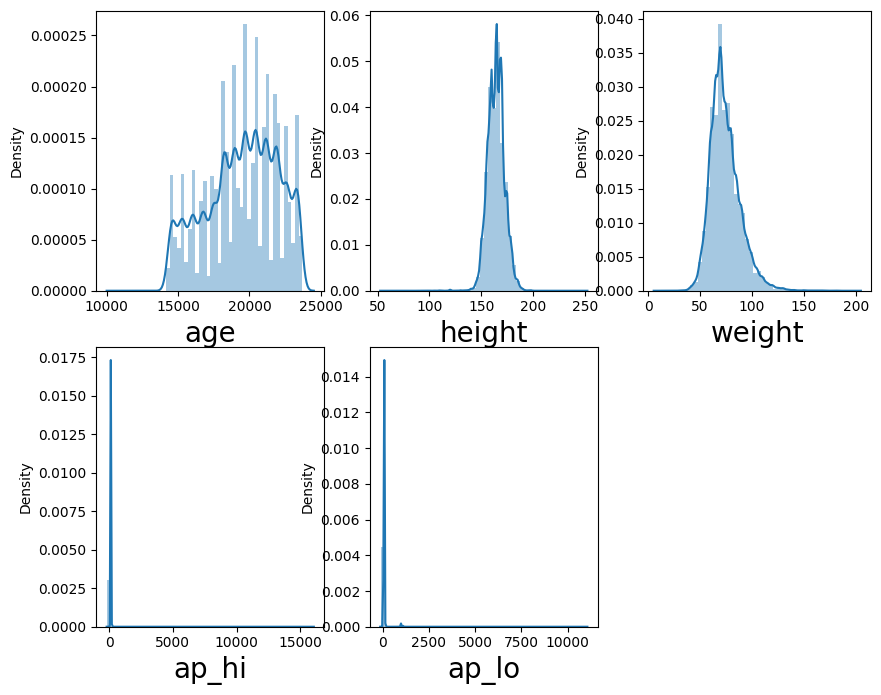

In [20]:
plt.figure(figsize=(10,8))
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [21]:
# standardize the data
from scipy.stats import zscore


z_score=zscore(df[['age','height','ap_hi','weight','ap_lo']])
abs_z_score=np.abs(z_score)#apply the formula and you get the scaled data
filtering_entry=(abs_z_score < 3).all(axis=1)
df=df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


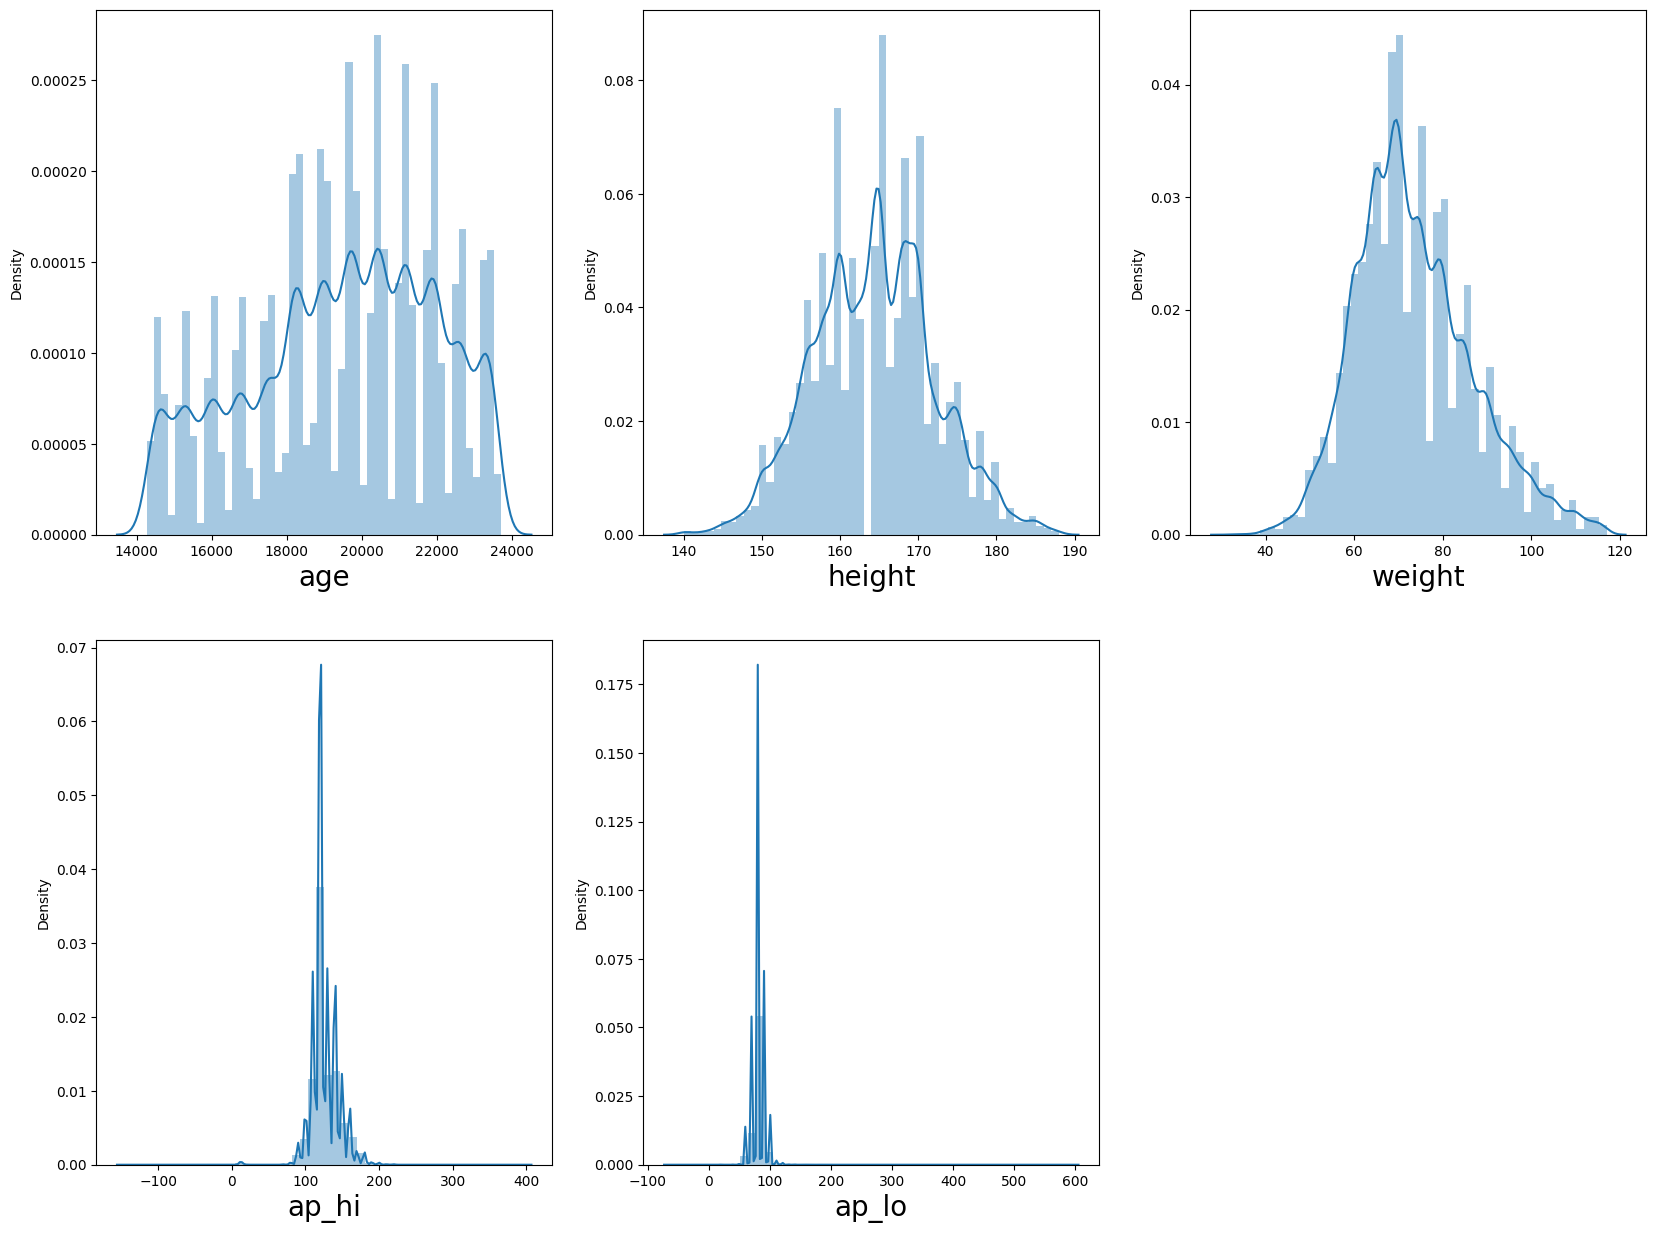

In [23]:
plt.figure(figsize=(20,15))
plotnumber=1
for column in df[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

* All the features are normally distributed.

* Lets check the Multicollinearity by plotting heatmap.

* After observing the multicollinearity problem, lets start to build the model.

In [24]:
df_corr=df.corr().abs()

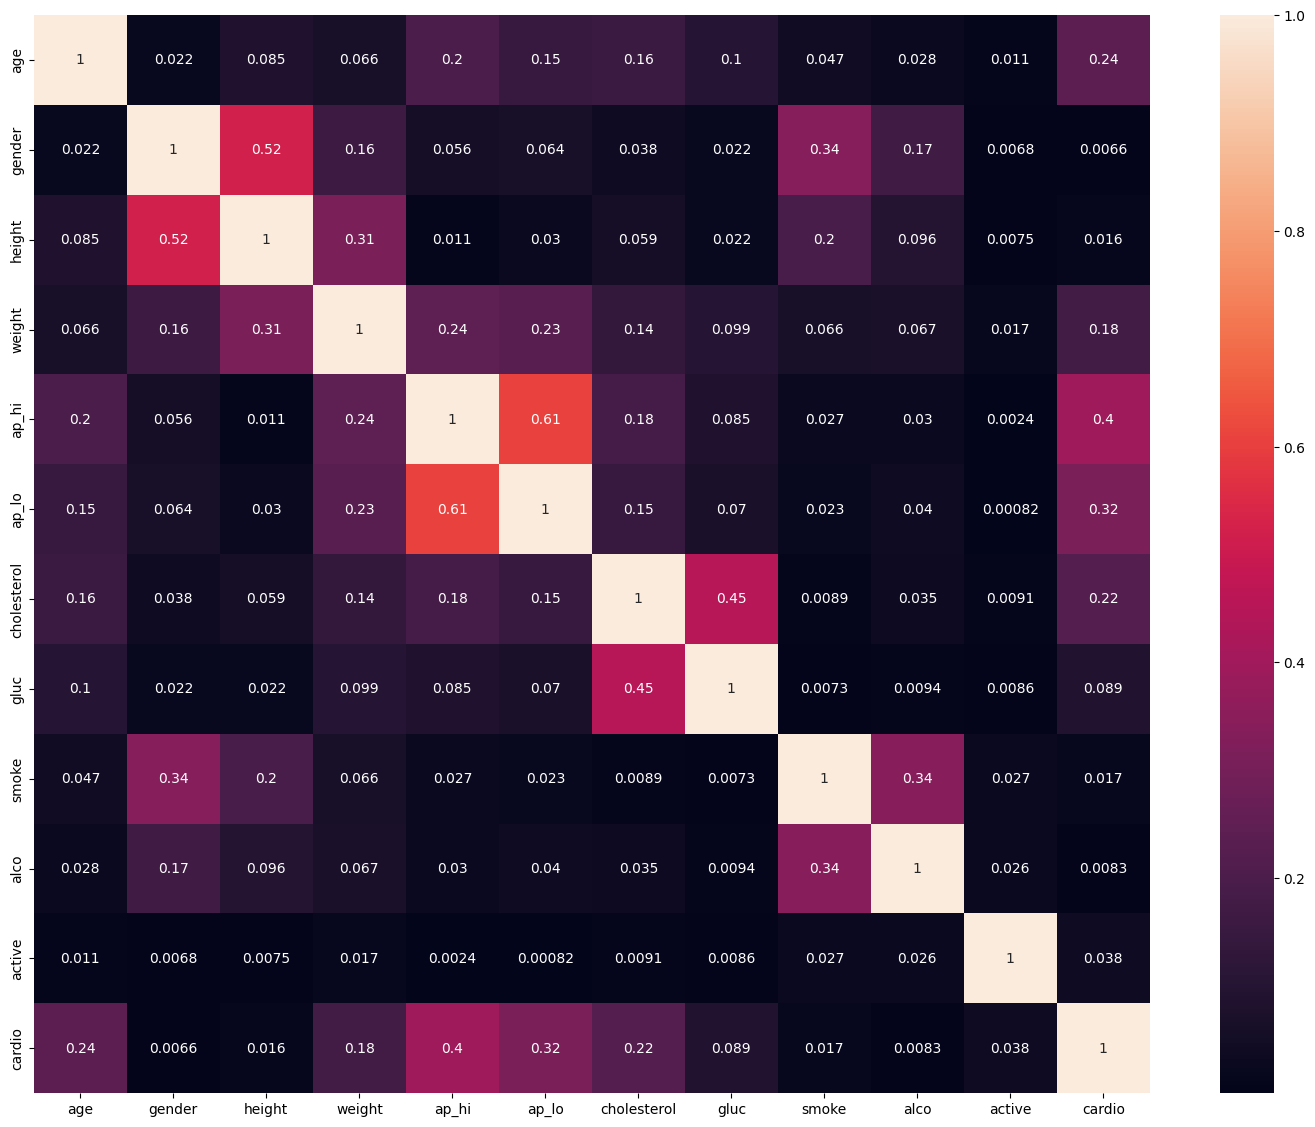

In [25]:
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

There is no multicollinearity problem, lets build the model

In [26]:
# Splitting the features as x and target as y
x=df.drop(columns=['cardio'])
y=df.cardio

# Train Test Split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=94255)

# Model Confidence/Accuracy

In [28]:
random_clf =RandomForestClassifier()

In [29]:
#Train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("=================Training Score===============")
        print("Accuracy Score ==> ",accuracy_score(y_train,y_pred)*100)
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Testing Score===============")
        print("Accuracy Score ==> ",accuracy_score(y_test,pred)*100)
        print("Classification Report==> ", classification_report(y_test,pred))

In [31]:
#check train and test score
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)

=================Training Score===============
Accuracy Score ==>  99.97822644497228
=================Testing Score===============
Accuracy Score ==>  71.81710213776722
Classification Report==>                precision    recall  f1-score   support

           0       0.72      0.74      0.73      8569
           1       0.72      0.69      0.71      8271

    accuracy                           0.72     16840
   macro avg       0.72      0.72      0.72     16840
weighted avg       0.72      0.72      0.72     16840



It seems our model is overfitted, lets use Hyperparameter tuning to resolve the overfitted model

* We use ***GridSearchCV*** technique for tuning the model

In [34]:
#Random Forest Classifier
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,13],
       'min_samples_leaf':[5,8]}

grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print("Best_Params:",grd.best_params_)

Best_Params: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 13, 'n_estimators': 13}


In [35]:
random_clf=grd.best_estimator_ #reinstantiating with best params
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, min_samples_split=13,
                       n_estimators=13)

In [36]:
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metrics_score(random_clf,x_train,x_test,y_train,y_test,train=False)

=================Training Score===============
Accuracy Score ==>  74.69517022961205
=================Testing Score===============
Accuracy Score ==>  73.43230403800474
Classification Report==>                precision    recall  f1-score   support

           0       0.71      0.80      0.75      8569
           1       0.76      0.67      0.71      8271

    accuracy                           0.73     16840
   macro avg       0.74      0.73      0.73     16840
weighted avg       0.74      0.73      0.73     16840



We treated the overfitting problem with best parameters given by GridSearchCV.

# Let plot best model by using ROC Curve

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.metrics import roc_curve, RocCurveDisplay

In [39]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [ ]:
#Train Test Split

In [40]:
x=df.drop(columns=['cardio'],axis=1)
y=df.cardio

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=94062)

In [42]:
#Training with all classifiers
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
print("All Models are Trained")

All Models are Trained


# Lets Check ROC AUC Curve for the fitted Model

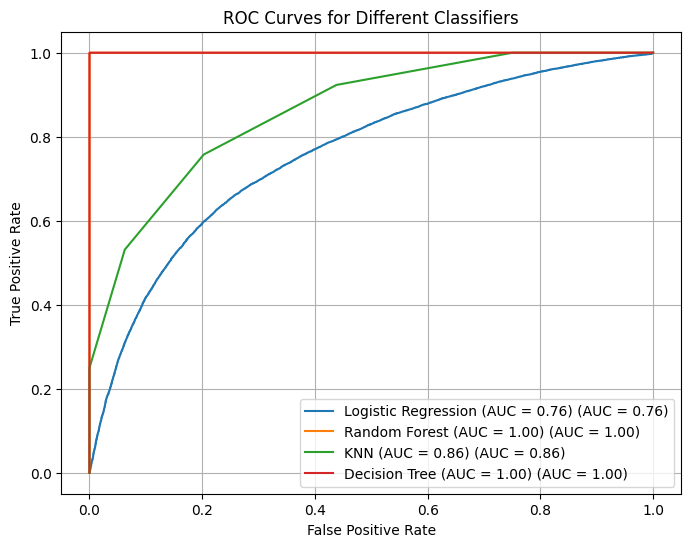

In [45]:
plt.figure(figsize=(8, 6))
classifiers = [lr, rf, knn, dt]
labels = ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree']

for clf, label in zip(classifiers, labels):
    y_score = clf.predict_proba(x_train)[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_score)
    auc = roc_auc_score(y_train, y_score)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=f'{label} (AUC = {auc:.2f})')
    roc_display.plot(ax=plt.gca())

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

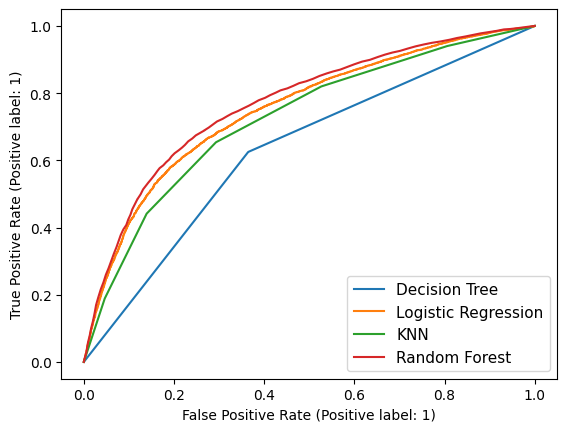

In [46]:
# Create the display object
disp = RocCurveDisplay.from_estimator(dt, x_test, y_test)

# Plot ROC curve for logistic regression
RocCurveDisplay.from_estimator(lr, x_test, y_test, ax=disp.ax_)

# Plot ROC curve for k-nearest neighbors
RocCurveDisplay.from_estimator(knn, x_test, y_test, ax=disp.ax_)

# Plot ROC curve for random forest
RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=disp.ax_)

# Add legend
plt.legend(["Decision Tree", "Logistic Regression", "KNN", "Random Forest"], prop={'size': 11}, loc='lower right',)

# Show the plot
plt.show()

Among all the models Random Forest is best performing model by ROC AUC Curve.